#Convolutional neural network

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
(train_images, train_labels) ,(test_images, test_labels) = datasets.cifar10.load_data()


# Normalize pixel values to be between 0 and 1
train_images , test_images = train_images/255, test_images/255

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 6s 0us/step


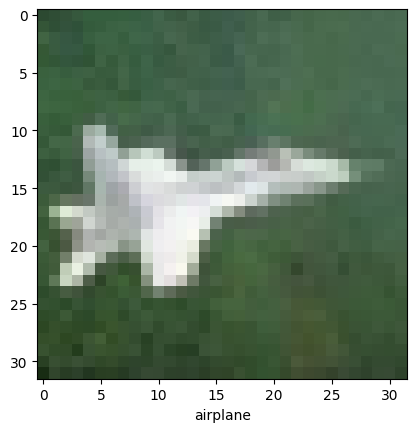

In [3]:
img_ind =77
plt.imshow(train_images[img_ind],cmap= plt.cm.binary)
plt.xlabel(class_names[train_labels[img_ind][0]])
plt.show()

#Building the CNN archictecture
Stacking Conv2D layers , Maxpooling2D layer and then finally Dense layers

In [4]:
model = models.Sequential()      # creating the sequential networking

#adding the layers using model.add
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = "relu"))



##Layer 1

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

##Layer 2

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

##Other Layers

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [5]:
#checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

##Adding dense layers
Dense layers are needed to extract the features from convolutional layersa and to classify them

In [6]:
model.add(layers.Flatten())        #flattens the output of convolutional layer to a single column
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10))        #output layer has 10 nodes as we need to classify them into 10 categoriesl

In [7]:
#now lets check the model summary again
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

##Training
we will compiel and train/ fit the model

In [8]:
model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.fit(train_images,train_labels, epochs =10 , validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 119s 74ms/step - loss: 1.5541 - accuracy: 0.4342 - val_loss: 1.2587 - val_accuracy: 0.5506
Epoch 2/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.1791 - accuracy: 0.5808 - val_loss: 1.0732 - val_accuracy: 0.6185
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0272 - accuracy: 0.6402 - val_loss: 1.0266 - val_accuracy: 0.6354
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9210 - accuracy: 0.6765 - val_loss: 0.9324 - val_accuracy: 0.6776
Epoch 5/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8437 - accuracy: 0.7048 - val_loss: 0.9048 - val_accuracy: 0.6817
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7827 - accuracy: 0.7248 - val_loss: 0.9161 - val_accuracy: 0.6902
Epoch 7/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7376 - accuracy: 0.7410 - val_loss: 0.8691 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose =2)
print(test_acc)